<a href="https://colab.research.google.com/github/BMac23/Mat421/blob/main/Section_17_2%2C_17_3%2C_17_4_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Interpolation

Interpolation is the process of getting a set of data points and trying to approximate an equation from thst set.

## Linear Interpolation
Linear interpolation is the process of assuming that an estimated point lies on a straight line between two prior points of data. This process is a little less accurate as it can lose some of the "curves" that a function may have. For example:

In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [2]:
x = [0, 1, 2]   # X-values
y = [1, 2, 5]   # Y-values

f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)

3.5


This predicts that the value at 1.5 will be 3.5. Let's see how this works by graphing.

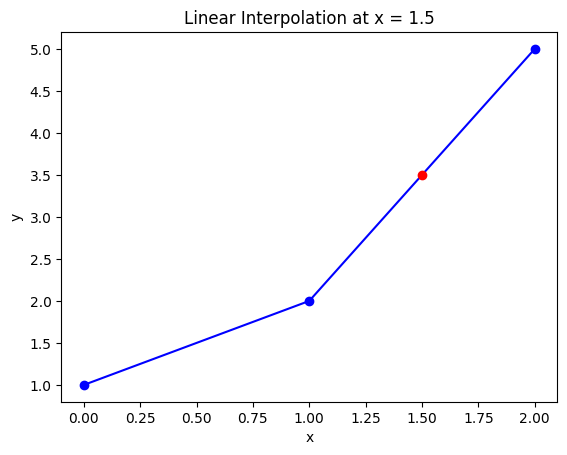

In [3]:
plt.figure()
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

It essentially takes whatever data point that's on the line as the predicted value.

To create my own function of my_lin_interp would be given like this.

In [5]:
def my_lin_interp(x, y, X):
    Y = []

    for xi in X:
        for i in range(len(x) - 1):
            if x[i] <= xi <= x[i + 1]:

                yi = y[i] + (y[i + 1] - y[i]) * (xi - x[i]) / (x[i + 1] - x[i])
                Y.append(yi)
                break
        else:
            Y.append(None)

    return Y

x = [0, 1, 2]
y = [1, 2, 5]
print(my_lin_interp(x, y, [0.5, 1.5]))

[1.5, 3.5]


## Cubic Spline Interpolation

Cubic spline interpolation is the process of assuming that the function between each point is in fact a cubic function. It takes the equation of:
$S_i(x)=a_ix^3+b_ix^2+c_ix+di$. In this form, we must try to find the coefficients of $a_i, b_i, c_i,$ and $d_i$.

Now we will try Cubic Spline Interpolation on our data from earlier.

In [6]:
from scipy.interpolate import CubicSpline
import numpy as np

In [11]:
x = [0, 1, 2]   # X-values
y = [1, 2, 5]   # Y-values

f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

[1.         1.01010513 1.020235   1.03041434 1.04066788 1.05102036
 1.06149651 1.07212107 1.08291877 1.09391435 1.10513254 1.11659808
 1.1283357  1.14037013 1.15272612 1.16542839 1.17850168 1.19197072
 1.20586026 1.22019501 1.23499973 1.25029913 1.26611797 1.28248097
 1.29941286 1.31693839 1.33508228 1.35386927 1.3733241  1.3934715
 1.4143362  1.43594294 1.45831646 1.48148148 1.50546275 1.53028499
 1.55597295 1.58255136 1.61004494 1.63847845 1.6678766  1.69826414
 1.7296658  1.76210632 1.79561043 1.83020285 1.86590834 1.90275163
 1.94075744 1.97995051 2.02035455 2.06196956 2.10477183 2.14873663
 2.19383922 2.24005487 2.28735885 2.33572641 2.38513283 2.43555337
 2.4869633  2.53933787 2.59265237 2.64688204 2.70200217 2.757988
 2.81481481 2.87245787 2.93089244 2.99009378 3.05003715 3.11069784
 3.17205109 3.23407218 3.29673637 3.36001892 3.42389511 3.48834019
 3.55332944 3.61883811 3.68484148 3.7513148  3.81823335 3.88557239
 3.95330718 4.02141299 4.08986508 4.15863873 4.22770919 4.2970517

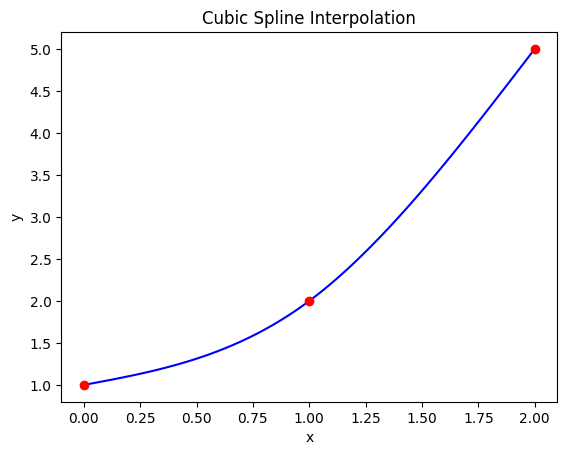

In [8]:
plt.figure()
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Trying to create my own cubic spline interpolation without using prebuilt functions would look like this:

In [14]:
import numpy as np

import numpy as np

def my_cubic_spline_flat(x, y, X):
    n = len(x)
    a = {k: v for k, v in enumerate(y)}
    h = {k: x[k + 1] - x[k] for k in range(n - 1)}

    # Solve for c, the coefficients of the cubic polynomial
    A = np.zeros((n, n))
    b = np.zeros(n)

    # Set up the equations for the interior points
    for i in range(1, n - 1):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]
        b[i] = 3 * ((a[i + 1] - a[i]) / h[i] - (a[i] - a[i - 1]) / h[i - 1])

    # Flat spline boundary conditions
    A[0, 0] = 2
    A[0, 1] = 1
    A[n - 1, n - 2] = 1
    A[n - 1, n - 1] = 2

    # Solve the system
    c = np.linalg.solve(A, b)

    # Solve for b and d
    b = dict()
    d = dict()
    for i in range(n - 1):
        b[i] = (a[i + 1] - a[i]) / h[i] - h[i] * (c[i + 1] + 2 * c[i]) / 3
        d[i] = (c[i + 1] - c[i]) / (3 * h[i])

    # Function to evaluate spline at a single point
    def spline(x0):
        for i in range(n - 1):
            if x[i] <= x0 <= x[i + 1]:
                xi = x0 - x[i]
                return a[i] + b[i] * xi + c[i] * xi**2 + d[i] * xi**3

        # If x0 is outside the range of x, return None
        return None

    # Evaluate spline at each point in X
    Y = np.array([spline(xi) for xi in X])
    return Y


print(my_cubic_spline_flat(x,y,[0.5, 1.5]))

[1.375 3.375]


Here we can see that those values fit our curve shown earlier.

## Lagrange Interpolation

Lagrange Interpolation finds a single polynomial that fits through all of the functions. This works by creating them as a combination of Lagrange basis polynomials $P_i(x)=∏^n_{j=1,j≠i}\frac{x−x_j}{x_i−x_j}$ and the final function is $L(x)=∑^n_{i=1}y_iP_i(x)$

In [19]:
from scipy.interpolate import lagrange

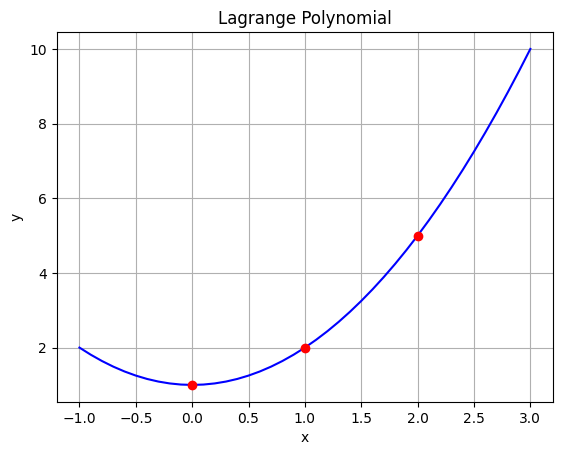

In [20]:
f = lagrange(x, y)

fig = plt.figure()
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Creating my own Lagrange function with similar setup to the previous ones would look like:

In [21]:
def my_lagrange(x, y, X):
    def lagrange_basis(xi, xj, x):
        product = 1
        for xj_elem in xj:
            if xj_elem != xi:
                product *= (x - xj_elem) / (xi - xj_elem)
        return product

    Y = []
    for x_val in X:
        Lx = 0
        for xi, yi in zip(x, y):
            Lx += yi * lagrange_basis(xi, x, x_val)
        Y.append(Lx)
    return Y

print(my_lagrange(x, y, [0.5, 1.5]))

[1.25, 3.25]


And here we finally see the difference between all of these different methods.They have their pros and cons with while linear interpolation seems the least helpful, it can be quite accurate for more linear data sets like a stock rising or falling. Cubic interpolation can be very accurate especially if tracking the position of something moving like an ice skater. And Lagrange interpolation can be nice as it might even help extrapolate for data outside of the set that we have.